<a href="https://colab.research.google.com/github/Rhodham96/Projects/blob/main/GANs/GANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GANs - Generative Adversarial Networks

In [14]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.utils as vutils
import os


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
transform = transforms.Compose([
    transforms.ToTensor()
])
# import a few images (MNIST Dataset)
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(f"mnist_trainset = {len(mnist_trainset)}")
print(f"mnist_testset = {len(mnist_testset)}")

mnist_trainset = 60000
mnist_testset = 10000


In [17]:
mnist_trainset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [18]:
type(mnist_trainset[0])

tuple

In [19]:
train_image_zero, train_target_zero = mnist_trainset[0]

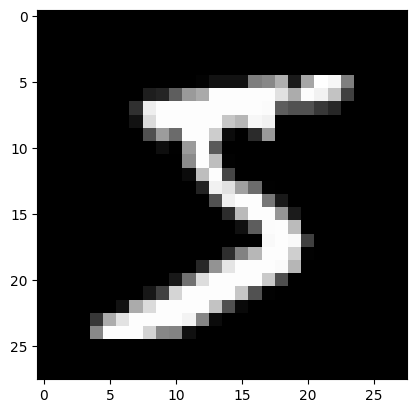

In [20]:
plt.imshow(train_image_zero.squeeze().numpy(), cmap="gray")

In [21]:
class Generator(nn.Module):
  def __init__(self, noise_dim=100, image_dim=784):
    super(Generator, self).__init__()
    self.net = nn.Sequential(
        nn.Linear(noise_dim, 128),
        nn.ReLU(inplace=True),
        nn.Linear(128, image_dim),
        nn.Tanh()
    )
  def forward(self,x):
    return self.net(x)


In [22]:
class Discriminator(nn.Module):
  def __init__(self, image_dim=784):
    super(Discriminator, self).__init__()
    self.net = nn.Sequential(
        nn.Linear(image_dim, 128),
        nn.LeakyReLU(0.2,inplace=True), # avoid dead neurons, backpropagation work also (not with zero values)
        nn.Linear(128,1),
        nn.Sigmoid()
    )
  def forward(self, x):
    return self.net(x)

In [23]:
generator = Generator()
generator.to(device)
discriminator = Discriminator()
discriminator.to(device)

# generate a batch of fake images to see if sizes are ok
z = torch.randn(16,100).to(device)
fake_images = generator(z)
preds = discriminator(fake_images)
print(fake_images.shape, preds.shape)


torch.Size([16, 784]) torch.Size([16, 1])


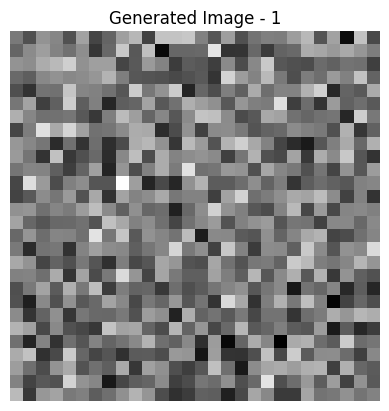

Epoch [1/100], D Loss: 0.7307, G Loss: 2.0044
Epoch [2/100], D Loss: 0.7567, G Loss: 2.0753
Epoch [3/100], D Loss: 0.7446, G Loss: 2.1756
Epoch [4/100], D Loss: 0.7477, G Loss: 1.9049
Epoch [5/100], D Loss: 0.7718, G Loss: 1.7152
Epoch [6/100], D Loss: 0.7296, G Loss: 2.1045
Epoch [7/100], D Loss: 0.8159, G Loss: 2.0079
Epoch [8/100], D Loss: 0.7785, G Loss: 2.6206
Epoch [9/100], D Loss: 0.9150, G Loss: 1.8152
Epoch [10/100], D Loss: 0.8443, G Loss: 1.8128


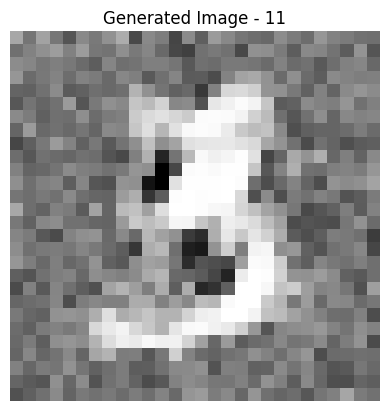

Epoch [11/100], D Loss: 0.8525, G Loss: 2.4210
Epoch [12/100], D Loss: 0.8493, G Loss: 1.7996
Epoch [13/100], D Loss: 0.7702, G Loss: 2.5768
Epoch [14/100], D Loss: 0.8126, G Loss: 1.9188
Epoch [15/100], D Loss: 0.8143, G Loss: 1.6564
Epoch [16/100], D Loss: 0.8265, G Loss: 1.9250
Epoch [17/100], D Loss: 0.8104, G Loss: 1.6821
Epoch [18/100], D Loss: 0.8499, G Loss: 1.5650
Epoch [19/100], D Loss: 1.0353, G Loss: 2.2358
Epoch [20/100], D Loss: 0.8570, G Loss: 1.9155


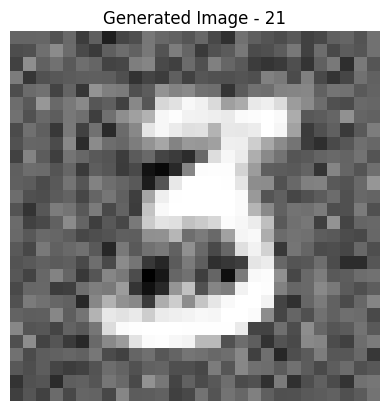

Epoch [21/100], D Loss: 0.8589, G Loss: 1.9407
Epoch [22/100], D Loss: 0.8256, G Loss: 1.9638
Epoch [23/100], D Loss: 0.7777, G Loss: 1.9087
Epoch [24/100], D Loss: 0.8524, G Loss: 2.2992
Epoch [25/100], D Loss: 0.8750, G Loss: 1.8032
Epoch [26/100], D Loss: 0.8736, G Loss: 1.3931
Epoch [27/100], D Loss: 0.8804, G Loss: 2.0424
Epoch [28/100], D Loss: 0.9681, G Loss: 1.9062
Epoch [29/100], D Loss: 0.8466, G Loss: 1.6323
Epoch [30/100], D Loss: 0.7995, G Loss: 1.8456


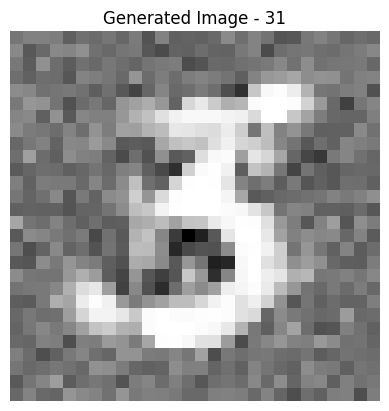

Epoch [31/100], D Loss: 0.8558, G Loss: 1.7893
Epoch [32/100], D Loss: 0.9479, G Loss: 1.8393
Epoch [33/100], D Loss: 0.8528, G Loss: 1.8810
Epoch [34/100], D Loss: 0.9732, G Loss: 1.9929
Epoch [35/100], D Loss: 0.8929, G Loss: 1.9763
Epoch [36/100], D Loss: 0.8547, G Loss: 1.6814
Epoch [37/100], D Loss: 0.8175, G Loss: 1.5430
Epoch [38/100], D Loss: 0.8595, G Loss: 2.0205
Epoch [39/100], D Loss: 0.9450, G Loss: 2.5486
Epoch [40/100], D Loss: 0.8193, G Loss: 1.4901


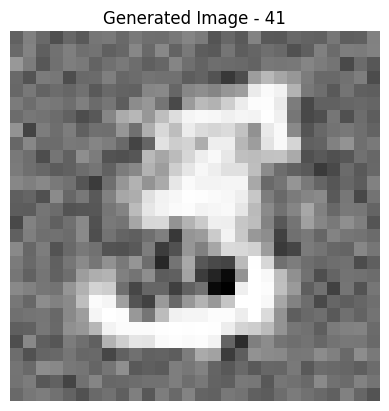

Epoch [41/100], D Loss: 0.8433, G Loss: 2.0451
Epoch [42/100], D Loss: 0.8343, G Loss: 1.8890
Epoch [43/100], D Loss: 0.8627, G Loss: 1.6763
Epoch [44/100], D Loss: 0.9897, G Loss: 1.7175
Epoch [45/100], D Loss: 0.8186, G Loss: 1.8237
Epoch [46/100], D Loss: 0.7752, G Loss: 1.9172
Epoch [47/100], D Loss: 0.9005, G Loss: 2.1217
Epoch [48/100], D Loss: 0.8128, G Loss: 1.0363
Epoch [49/100], D Loss: 0.8398, G Loss: 1.9202
Epoch [50/100], D Loss: 0.8259, G Loss: 1.6825


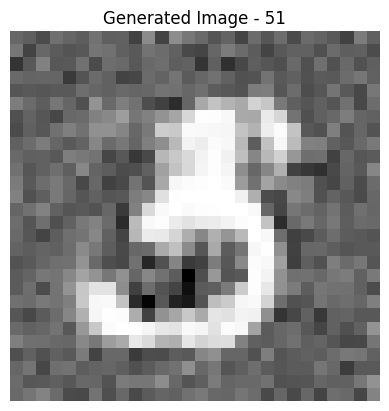

Epoch [51/100], D Loss: 0.8956, G Loss: 1.9476
Epoch [52/100], D Loss: 0.9371, G Loss: 1.5684
Epoch [53/100], D Loss: 0.8919, G Loss: 1.9468
Epoch [54/100], D Loss: 0.8894, G Loss: 1.6944
Epoch [55/100], D Loss: 0.7956, G Loss: 1.7003
Epoch [56/100], D Loss: 0.8488, G Loss: 1.7288
Epoch [57/100], D Loss: 0.8394, G Loss: 1.9478
Epoch [58/100], D Loss: 0.8824, G Loss: 1.5828
Epoch [59/100], D Loss: 0.9055, G Loss: 2.1952
Epoch [60/100], D Loss: 0.8884, G Loss: 1.4679


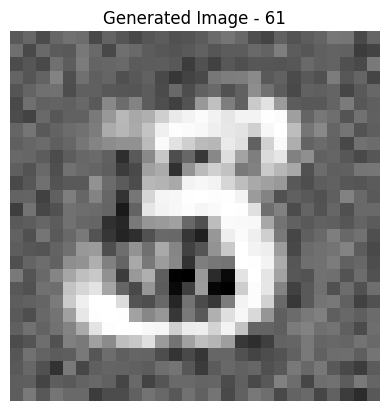

Epoch [61/100], D Loss: 0.7780, G Loss: 2.2503
Epoch [62/100], D Loss: 0.7636, G Loss: 1.8159
Epoch [63/100], D Loss: 0.8770, G Loss: 2.0149
Epoch [64/100], D Loss: 0.7470, G Loss: 1.5759
Epoch [65/100], D Loss: 0.8514, G Loss: 1.4245
Epoch [66/100], D Loss: 0.8113, G Loss: 1.8222
Epoch [67/100], D Loss: 0.8045, G Loss: 2.3030
Epoch [68/100], D Loss: 0.8586, G Loss: 2.2225
Epoch [69/100], D Loss: 0.8546, G Loss: 1.7108
Epoch [70/100], D Loss: 0.7883, G Loss: 2.0525


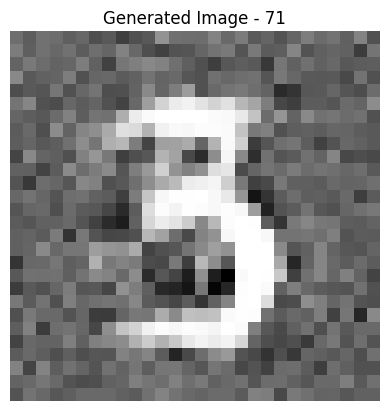

Epoch [71/100], D Loss: 0.8574, G Loss: 1.7021
Epoch [72/100], D Loss: 1.1673, G Loss: 1.8307
Epoch [73/100], D Loss: 1.0280, G Loss: 1.3739
Epoch [74/100], D Loss: 0.9183, G Loss: 1.2826
Epoch [75/100], D Loss: 1.1850, G Loss: 1.0629
Epoch [76/100], D Loss: 0.9996, G Loss: 1.9966
Epoch [77/100], D Loss: 0.9651, G Loss: 1.8499
Epoch [78/100], D Loss: 1.0154, G Loss: 1.5078
Epoch [79/100], D Loss: 1.2263, G Loss: 1.2739
Epoch [80/100], D Loss: 1.0101, G Loss: 1.5599


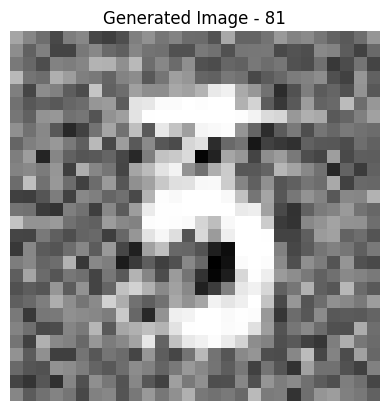

Epoch [81/100], D Loss: 1.0887, G Loss: 1.4465
Epoch [82/100], D Loss: 1.1084, G Loss: 1.3949
Epoch [83/100], D Loss: 0.9674, G Loss: 1.4115
Epoch [84/100], D Loss: 1.1324, G Loss: 1.0505
Epoch [85/100], D Loss: 1.0532, G Loss: 1.5814
Epoch [86/100], D Loss: 1.0081, G Loss: 1.1468
Epoch [87/100], D Loss: 0.9865, G Loss: 1.6349
Epoch [88/100], D Loss: 1.0712, G Loss: 1.7037
Epoch [89/100], D Loss: 1.0930, G Loss: 1.3073
Epoch [90/100], D Loss: 0.9231, G Loss: 1.2866


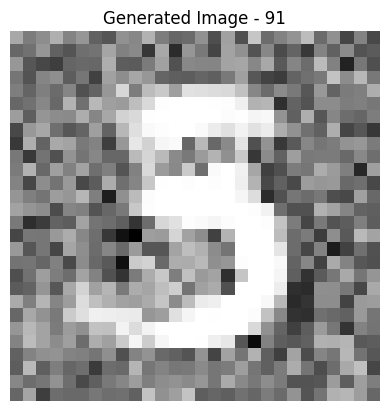

Epoch [91/100], D Loss: 0.9754, G Loss: 1.6991
Epoch [92/100], D Loss: 0.9135, G Loss: 1.7514
Epoch [93/100], D Loss: 1.0213, G Loss: 1.0615
Epoch [94/100], D Loss: 0.9850, G Loss: 1.8448
Epoch [95/100], D Loss: 0.9878, G Loss: 1.3042
Epoch [96/100], D Loss: 1.2013, G Loss: 1.6437
Epoch [97/100], D Loss: 1.2455, G Loss: 1.5614
Epoch [98/100], D Loss: 1.1427, G Loss: 1.3253
Epoch [99/100], D Loss: 0.9223, G Loss: 1.2905
Epoch [100/100], D Loss: 1.1975, G Loss: 1.3584


In [24]:
batch_size = 16
image_dim = 784
noise_dim = 100

train_dataloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=2e-4, betas=(0.5, 0.999))
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=2e-4, betas=(0.5, 0.999))
loss_fn = nn.BCELoss()

os.makedirs('generated_images', exist_ok=True)

d_losses = []
g_losses = []

treshold = 70
num_epochs = 100
fixed_noise = torch.randn(1, noise_dim).to(device)
for epoch in range(num_epochs):
  if epoch > treshold:
    d_steps = 1
    g_steps = 2
  else:
    d_steps = 3
    g_steps = 1
  with torch.no_grad():
    fake_image = generator(fixed_noise).detach().cpu().squeeze()

  if epoch%10 == 0 or epoch == 0:
    plt.imshow(fake_image.view(28, 28), cmap='gray')
    plt.title(f"Generated Image - {epoch+1}")
    plt.axis('off')
    plt.show()

  for real_images,_ in train_dataloader:
    batch_size = real_images.size(0)
    real_images = real_images.view(batch_size, -1).to(device)

    ## Train discriminator
    for _ in range(d_steps):
      noise = torch.randn(batch_size, noise_dim).to(device)
      fake_images = generator(noise)

      # Labels
      fake_labels = torch.full((batch_size, 1), 0.1).to(device)
      real_labels = torch.full((batch_size, 1), 0.9).to(device)

      # outputs
      outputs_fake = discriminator(fake_images.detach())
        # GPT explaination :"Hey, those fake_images, you just use them to
        # the discriminator loss. Don't propagate the gradients in the generator
      outputs_real = discriminator(real_images)

      # compute the loss
      d_loss_fake = loss_fn(outputs_fake, fake_labels)
      d_loss_real = loss_fn(outputs_real, real_labels)
      d_loss = d_loss_fake + d_loss_real

      # backpropagation
      d_optimizer.zero_grad()
      d_loss.backward()
      d_optimizer.step()

    ## Train generator
    for _ in range(g_steps):
      noise = torch.randn(batch_size, noise_dim).to(device)
      fake_images = generator(noise)
      outputs = discriminator(fake_images)

      g_loss = -torch.mean(torch.log(outputs + 1e-8))

      # backpropagation
      g_optimizer.zero_grad()
      g_loss.backward()
      g_optimizer.step()

  d_losses.append(d_loss.item())
  g_losses.append(g_loss.item())
  print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")


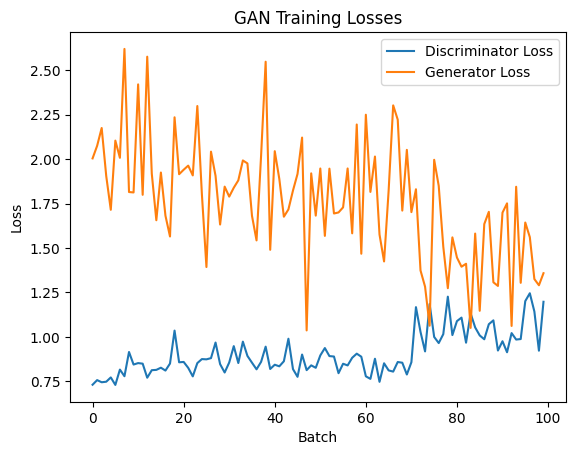

In [25]:
plt.plot(np.array(d_losses), label="Discriminator Loss")
plt.plot(np.array(g_losses), label="Generator Loss")
plt.legend()
plt.title("GAN Training Losses")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.show()

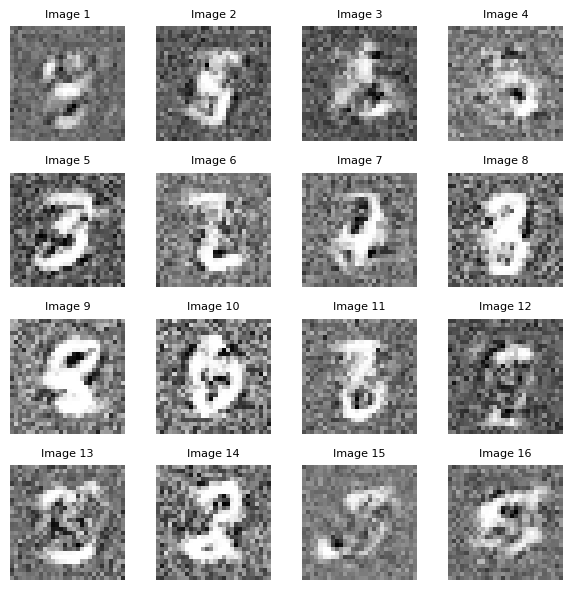

In [26]:
# Test
noise = torch.randn(16, noise_dim).to(device)
fake_images = generator(noise).view(-1, 28, 28).detach().cpu()
fake_images = (fake_images + 1) / 2

fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(fake_images[i], cmap="gray")
    ax.set_title(f"Image {i+1}", fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()